In [1]:
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from tensorflow import keras
from keras import layers, regularizers
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
import PIL.Image
import winsound

Загружаем датасет

In [2]:
dataset_path = 'Dataset2/'
img_size = 64
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1
    # horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    directory=dataset_path + 'train/',
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
valid_generator = val_datagen.flow_from_directory(
    directory=dataset_path + 'valid/',
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 25185 images belonging to 6 classes.
Found 6955 images belonging to 6 classes.


Строим модель

In [3]:
def prepare_model():
    act = 'relu'
    opt = 'adam'

    model = keras.Sequential([
        Conv2D(32, (3, 3), activation=act, input_shape=(img_size, img_size, 1)),
        Conv2D(64, (3, 3), activation=act),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation=act),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation=act),
        Conv2D(128, (3, 3), activation=act),
        MaxPooling2D(),
        Dropout(0.25),

        Flatten(),
        Dense(1024, activation=act),
        Dropout(0.5),
        Dense(6, activation='softmax')
    ])
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
    return model


model = prepare_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                    

Обучаем модель

In [5]:
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model5.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=25, verbose=1)
]

his = model.fit(train_generator, validation_data=valid_generator, epochs=epochs, callbacks=callbacks)

winsound.Beep(1500, 1500)

Epoch 1/100
393/394 [============================>.] - ETA: 0s - loss: 1.7235 - accuracy: 0.2499
Epoch 1: val_accuracy improved from -inf to 0.26628, saving model to model5.keras
394/394 [==============================] - 23s 57ms/step - loss: 1.7232 - accuracy: 0.2501 - val_loss: 1.6837 - val_accuracy: 0.2663
Epoch 2/100
394/394 [==============================] - ETA: 0s - loss: 1.6524 - accuracy: 0.2986
Epoch 2: val_accuracy improved from 0.26628 to 0.36664, saving model to model5.keras
394/394 [==============================] - 22s 55ms/step - loss: 1.6524 - accuracy: 0.2986 - val_loss: 1.5552 - val_accuracy: 0.3666
Epoch 3/100
393/394 [============================>.] - ETA: 0s - loss: 1.5380 - accuracy: 0.3675
Epoch 3: val_accuracy improved from 0.36664 to 0.47908, saving model to model5.keras
394/394 [==============================] - 22s 55ms/step - loss: 1.5379 - accuracy: 0.3675 - val_loss: 1.3544 - val_accuracy: 0.4791
Epoch 4/100
394/394 [==============================] - ETA

Выводим графики

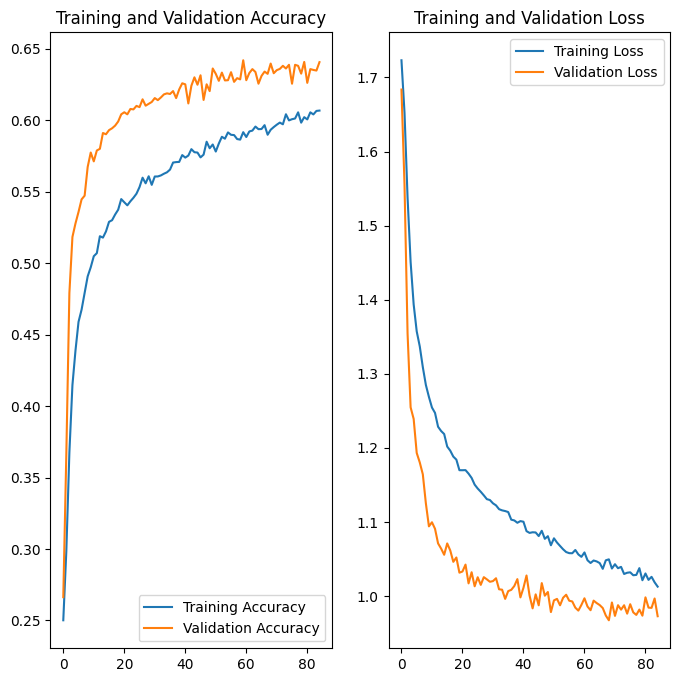

In [6]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()